# San Francisco Housing Cost Analysis

In [ ]:
# Load imports:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key:
load_dotenv()
map_box_api=os.getenv('mapbox')

## Load Data

In [3]:
# Read census data into a DataFrame with year as the index:
file_path=Path('Data/sfo_neighborhoods_census_data.csv')
sfo_data_year_index=pd.read_csv(file_path,index_col='year')
sfo_data_year_index.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

## Housing Units Per Year

In [4]:
# Calculate the mean number of housing units per year:
housing_units_per_year=sfo_data_year_index.groupby('year').mean().drop(columns=['sale_price_sqr_foot','gross_rent'])
housing_units_per_year

housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242

In [5]:
# Save the DataFrame as a .csv file:
housing_units_per_year.to_csv(r'avg_units_by_year.csv',index=True)  

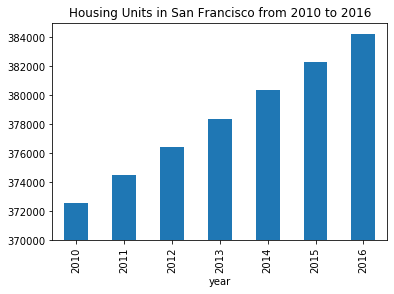

In [6]:
# Use Pandas plot function to plot the average housing units per year:
housing_units_per_year.plot(kind='bar',
                           ylim=(370000,385000),
                           legend=False,
                           title='Housing Units in San Francisco from 2010 to 2016'
                          )

- - - 

## Average Housing Costs in San Francisco Per Year

In [7]:
# Calculate average sale price per square foot and average gross rent:
avg_price_sqft_rent=sfo_data_year_index.groupby('year').mean().drop(columns=['housing_units'])
display(avg_price_sqft_rent)

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

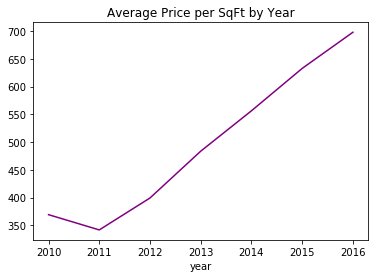

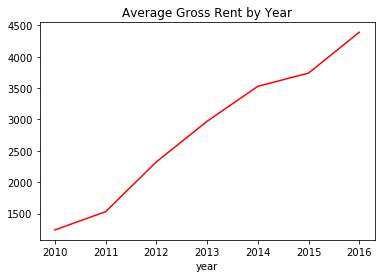

In [8]:
## Create two line charts, one to plot the average sale price per square foot and another for average montly rent:
# Line chart for average sale price per square foot:
avg_price_sqr_foot=pd.DataFrame(avg_price_sqft_rent,columns=['sale_price_sqr_foot'])
avg_price_sqr_foot.plot(
    legend=False,
    color='purple',
    title ='Average Price per SqFt by Year'
)
# Line chart for average montly rent:
avg_rent=pd.DataFrame(avg_price_sqft_rent,columns=['gross_rent'])
avg_rent.plot(
    legend=False,
    color='red',
    title='Average Gross Rent by Year'
)

- - - 

## Average Prices by Neighborhood

In [9]:
# Read census data into a DataFrame without year as the index:
sfo_data=pd.read_csv(file_path)
# Group by year and neighborhood and create new DataFrame with mean values:
grp_year_neighborhoods=sfo_data.groupby(['year','neighborhood'],as_index=False).mean()
# Print San Francisco census DataFrame without year index:
sfo_data.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [10]:
# Use hvplot to create an interactive line chart of the average price per square foot:
grp_year_neighborhoods.hvplot(
    x='year',
    y='sale_price_sqr_foot',
    xlabel='Year',
    ylabel='Avg Sale Price per Square Foot',
    groupby='neighborhood'
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [11]:
# Use hvplot to create an interactive line chart of the average monthly rent:
grp_year_neighborhoods.hvplot(
    x='year',
    y='gross_rent',
    xlabel='Year',
    ylabel='Avg Monthly Rent',
    groupby='neighborhood'
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In [12]:
# Create a DataFrame from the top 10 most expensive neighborhoods to own a house in:
top10_exp_hoods=sfo_data.groupby(['neighborhood'],as_index=False).mean().nlargest(10,'sale_price_sqr_foot').drop(columns='year')
top10_exp_hoods

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
65  Union Square District           903.993258      377427.50  2555.166667
36         Merced Heights           788.844818      380348.00  3414.000000
38          Miraloma Park           779.810842      375967.25  2155.250000
51        Pacific Heights           689.555817      378401.00  2817.285714
71          Westwood Park           687.087575      382295.00  3959.000000
63         Telegraph Hill           676.506578      378401.00  2817.285714
57       Presidio Heights           675.350212      378401.00  2817.285714
10             Cow Hollow           665.964042      378401.00  2817.285714
56           Potrero Hill           662.013613      378401.00  2817.285714
60            South Beach           650.124479      375805.00  2099.000000

In [13]:
# Plot the data from the top 10 most expensive neighborhoods:
top10_exp_hoods.hvplot.bar(
    x='neighborhood',
    y='sale_price_sqr_foot',
    xlabel='Neighborhood',
    ylabel='Avg Sale Price Per Square Foot',
    legend=False,
    rot=90,
    title='Top 10 Most Expensive Neighborhoods in San Francisco',
    width=1000,
    height=500,
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In [14]:
# Fetch previous DataFrame grouped by year and neighborhood:
grp_year_neighborhoods.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [15]:
# Plot the data from the top 10 expensive neighborhoods grouped by rent and price per square foot:
grp_year_neighborhoods.hvplot.bar(
    x='year',
    y=['gross_rent','sale_price_sqr_foot'],
    xlabel='Neighborhood',
    ylabel='Values',
    legend=False,
    rot=90,
    height=500,
    groupby='neighborhood',
    title='Rent and Price Per Square Foot in Each Neighborhood Per Year',
    width=1000,
)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

### Load Location Data

In [16]:
# Load neighborhood coordinates:
coordinates_df=pd.read_csv(Path('Data/neighborhoods_coordinates.csv'))
coordinates_df.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### MapBox Data Preparation
1. Calculate the mean values for each neighborhood.
2. Join the average values with the neighborhood locations.

In [17]:
# Calculate the mean values for each neighborhood:
hood_value_df=sfo_data.drop(columns=['year']).rename(columns={'neighborhood':'Neighborhood'}).groupby(['Neighborhood']).mean()
hood_value_df.head()

sale_price_sqr_foot  housing_units   gross_rent
Neighborhood                                                    
Alamo Square              366.020712       378401.0  2817.285714
Anza Vista                373.382198       379050.0  3031.833333
Bayview                   204.588623       376454.0  2318.400000
Bayview Heights           590.792839       382295.0  3739.000000
Bernal Heights            576.746488       379374.5  3080.333333

In [18]:
# Join the average values with the neighborhood locations:
hood_location_values_df=pd.merge(coordinates_df,hood_value_df,on='Neighborhood')
hood_location_values_df.head()

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0      Alamo Square  37.791012 -122.402100           366.020712   
1        Anza Vista  37.779598 -122.443451           373.382198   
2           Bayview  37.734670 -122.401060           204.588623   
3   Bayview Heights  37.728740 -122.410980           590.792839   
4  Buena Vista Park  37.768160 -122.439330           452.680591   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
4       378076.5  2698.833333

### Mapbox Visualization

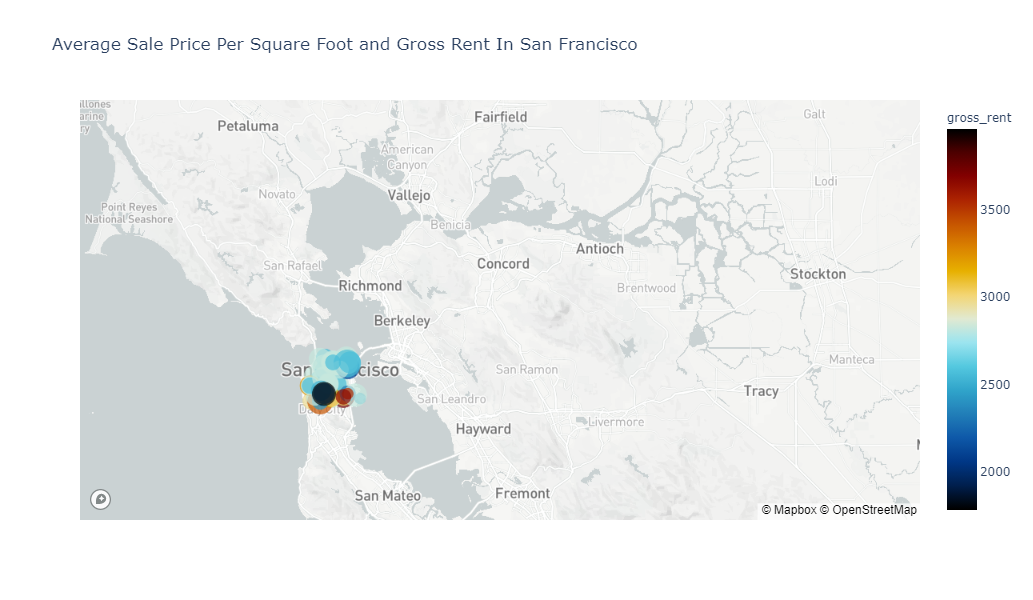

In [19]:
# Set the mapbox access token:
px.set_mapbox_access_token(map_box_api)
# Create a scatter mapbox to analyze neighborhood info:
hood_location_values=px.scatter_mapbox(
    hood_location_values_df,
    lat='Lat',
    lon='Lon',
    color='gross_rent',
    color_continuous_scale=px.colors.cyclical.IceFire,
    title='Average Sale Price Per Square Foot and Gross Rent In San Francisco',
    size='sale_price_sqr_foot',
    zoom=10,
    width=1000,
    height=600
)
hood_location_values.show()

## Cost Analysis
### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year:
most_exp_hoods_per_year=grp_year_neighborhoods[grp_year_neighborhoods['neighborhood'].isin(top10_exp_hoods['neighborhood'])]
most_exp_hoods_per_year.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
7   2010        Cow Hollow           569.379968         372560        1239
31  2010     Miraloma Park           680.608729         372560        1239
41  2010   Pacific Heights           496.516014         372560        1239
46  2010      Potrero Hill           491.450004         372560        1239
47  2010  Presidio Heights           549.417931         372560        1239

### Create parallel coordinates and parallel categories plot of most expensive neighborhoods by year

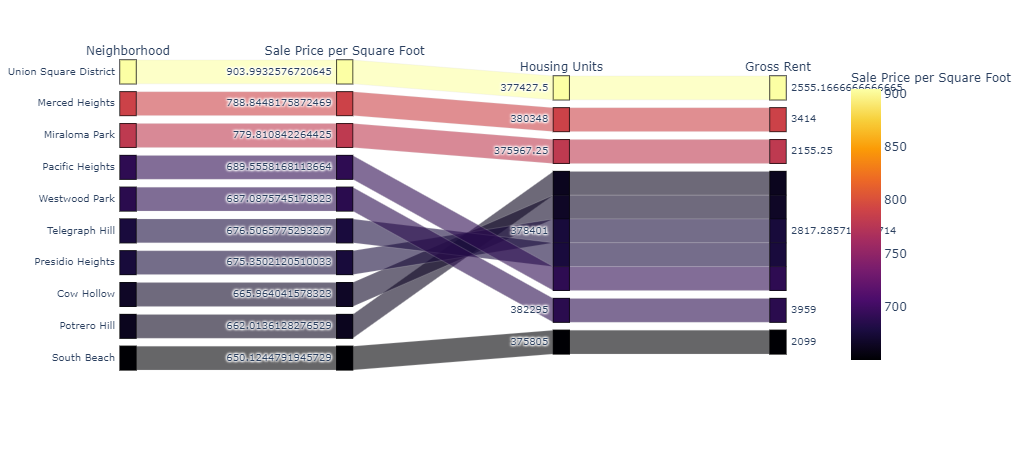

In [21]:
# Parallel Categories Plot:
px.parallel_categories(
    top10_exp_hoods,
    color='sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Inferno,
    dimensions=['neighborhood','sale_price_sqr_foot','housing_units','gross_rent'],
    labels={'neighborhood':'Neighborhood','sale_price_sqr_foot':'Sale Price per Square Foot','housing_units':'Housing Units','gross_rent':'Gross Rent'},
    width=1000,
)

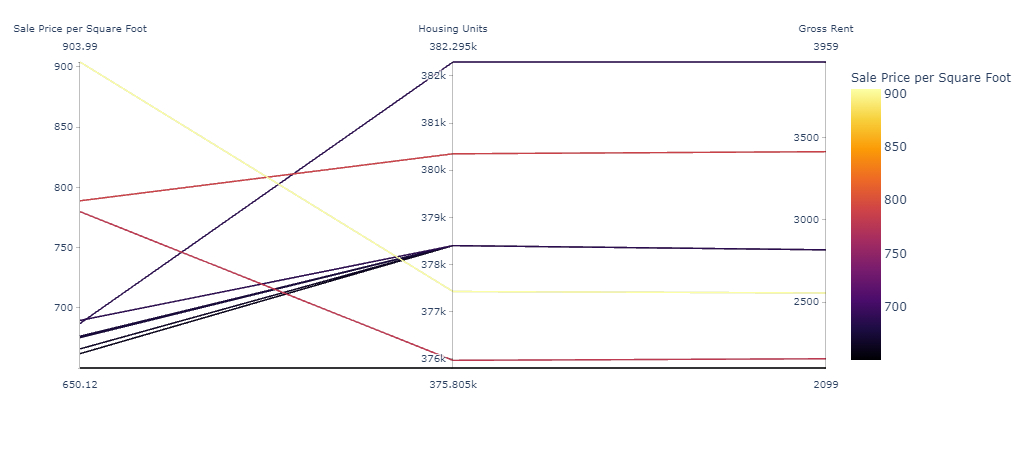

In [22]:
# Parallel Coordinates Plot:
px.parallel_coordinates(
    top10_exp_hoods,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    dimensions=['sale_price_sqr_foot','housing_units','gross_rent'],
    labels={'sale_price_sqr_foot':'Sale Price per Square Foot','housing_units':'Housing Units','gross_rent':'Gross Rent'},
    width=1000,
) 

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods by year

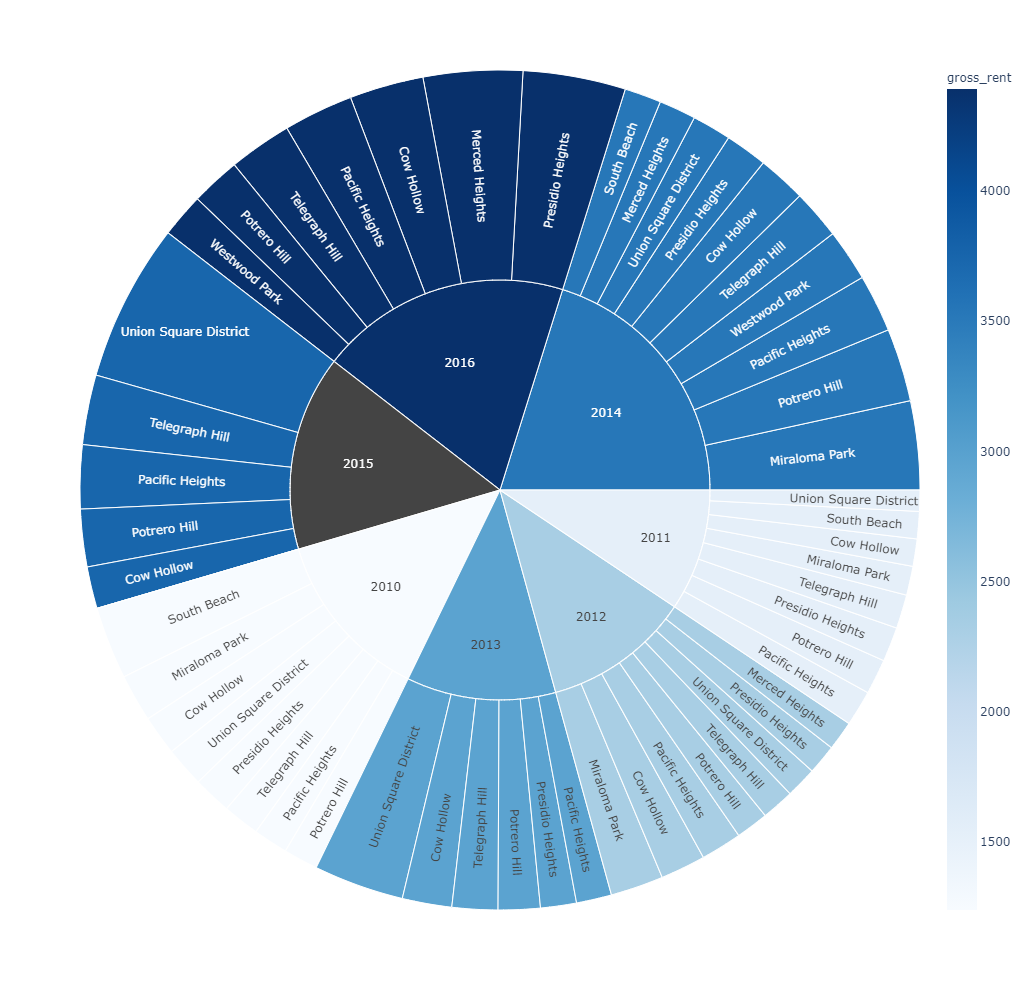

In [23]:
# Sunburst Plot:
px.sunburst(
    most_exp_hoods_per_year,
    path=['year','neighborhood'],
    color='gross_rent',
    color_continuous_scale=px.colors.sequential.Blues,
    values='sale_price_sqr_foot',
    width=1000,
    height=1000
    )